<a href="https://colab.research.google.com/github/191201-Hanshitha/Minor_Project/blob/main/FIFA_Players_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.offline as py
import plotly.graph_objects as go
data = pd.read_csv('/content/drive/MyDrive/CompleteDataset.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.



,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(17981, 75)

# Data Manipulation


In [ ]:
data.drop(['Unnamed: 0','Flag','Photo','Club Logo'], axis = 1,inplace=True)

data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data=data.dropna()

In [ ]:
def str2number(value):
    out = value.replace('€','')
    if 'K' in out:
        out = float(out.replace('K',''))*1000
    elif 'M' in out:
        out = float(out.replace('M',''))*1000000
    return float(out)

In [ ]:
data['Wage'] = [str2number(x) for x in data.Wage]
data['Value'] = [str2number(x) for x in data.Value]

In [ ]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RDM,RF,RM,RS,RW,RWB,ST,Preferred Position,Nationality_1,Preferred_Position_1
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228,89,...,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST,121,14
1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154,92,...,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW,5,12
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100,94,...,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW,18,8
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291,88,...,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST,158,14
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,2143,79,...,62.0,87.0,82.0,88.0,84.0,61.0,88.0,ST,120,14


In [ ]:
top10clubs = data[["Name", "Overall", "Club"]]
top10clubs.groupby("Club", as_index= False).mean().sort_values("Overall", ascending = False).head(10)

,Club,Overall
219,FC Barcelona,82.560000
330,Juventus,81.653846
466,Real Madrid CF,81.038462
222,FC Bayern Munich,79.423077
432,Paris Saint-Germain,77.964286
377,Manchester United,77.705882
397,Napoli,77.653846
477,Roma,77.370370
529,Sevilla FC,76.961538
323,Inter,76.720000


### overall of top 10 clubs

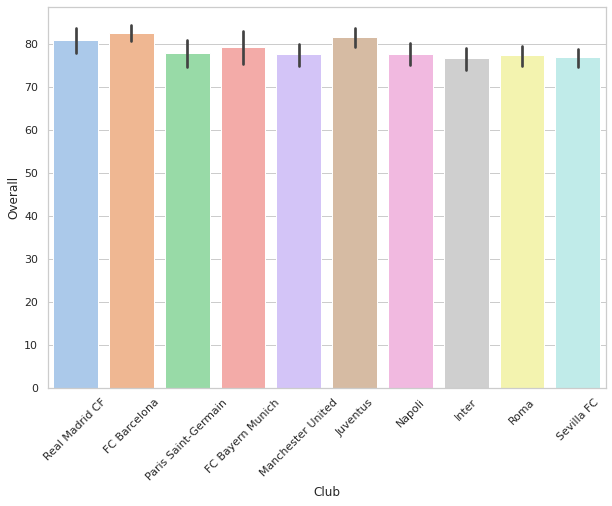

In [ ]:
topclubs = top10clubs.groupby("Club", as_index= False).mean().sort_values("Overall", ascending = False).head(10)
topclubs = list(topclubs["Club"])
clubs = topclubs
c = data.query('Club in @clubs')
sns.set(style="whitegrid", palette="pastel")
dims=(10,7)
fig, ax = plt.subplots(figsize=dims)
bar_wage = sns.barplot(data = c, y = 'Overall', x = 'Club')
a = plt.setp(ax.get_xticklabels(), rotation=45)

### Potential of top 10 clubs

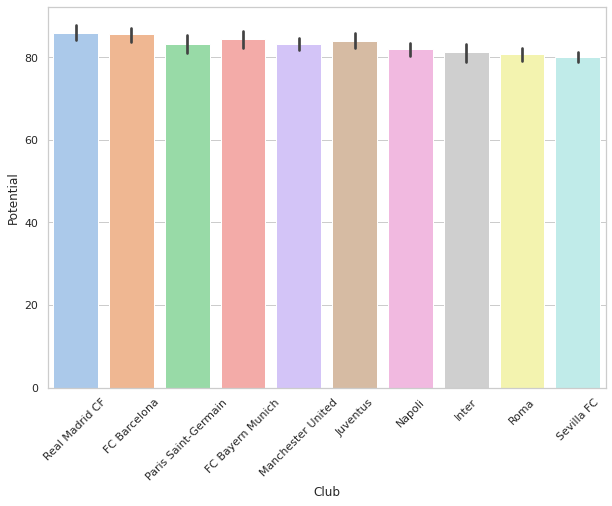

In [ ]:
clubs = topclubs
c = data.query('Club in @clubs')
sns.set(style="whitegrid", palette="pastel")
dims = (10, 7)
fig, ax = plt.subplots(figsize=dims)
bar_wage = sns.barplot(data = c, y = 'Potential', x = 'Club')
a = plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:
def overall_potential():
    overall = pd.DataFrame(data.groupby(["Age"])['Overall'].mean())
    potential = pd.DataFrame(data.groupby(["Age"])['Potential'].mean())
    merged = pd.merge(overall, potential, on='Age', how='inner')
    merged['Age']= merged.index
    fig, ax = plt.subplots(figsize=(11, 8))
    merged.reset_index(drop = True, inplace = True)
    p = plt.plot('Age', 'Overall', data=merged, marker='.', color='skyblue', linewidth=1, label ="Overall" )
    p = plt.plot('Age', 'Potential', data=merged, marker='.', color='green', linewidth=1, label = "Potential")
    p = plt.legend()

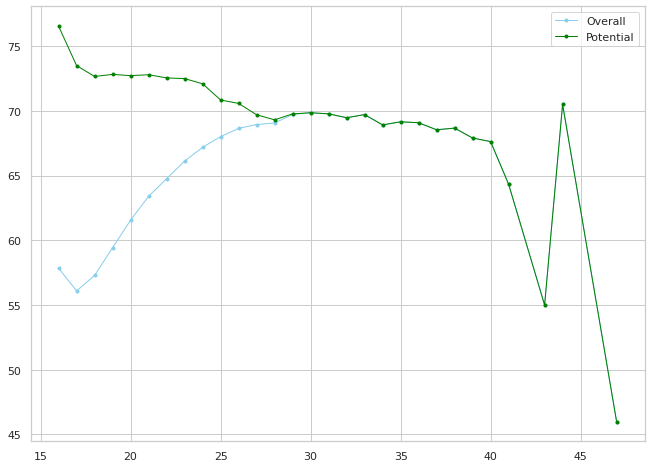

In [ ]:
overall_potential()

In [ ]:
data['Preferred Position'] = data['Preferred Positions'].str.split().str[0]
le = LabelEncoder()
data['Nationality_1']        = le.fit_transform(data['Nationality'].astype(str))
data['Preferred_Position_1'] = le.fit_transform(data['Preferred Position'].astype(str))

In [ ]:
Correlation_data = data[['Age','Overall','Potential','Preferred_Position_1','Nationality_1']]
Correlation_data.corr()

,Age,Overall,Potential,Preferred_Position_1,Nationality_1
Age,1.000000,0.459765,-0.218264,-0.052814,-0.029833
Overall,0.459765,1.000000,0.683474,-0.021502,-0.039084
Potential,-0.218264,0.683474,1.000000,-0.007843,-0.030274
Preferred_Position_1,-0.052814,-0.021502,-0.007843,1.000000,-0.002518
Nationality_1,-0.029833,-0.039084,-0.030274,-0.002518,1.000000


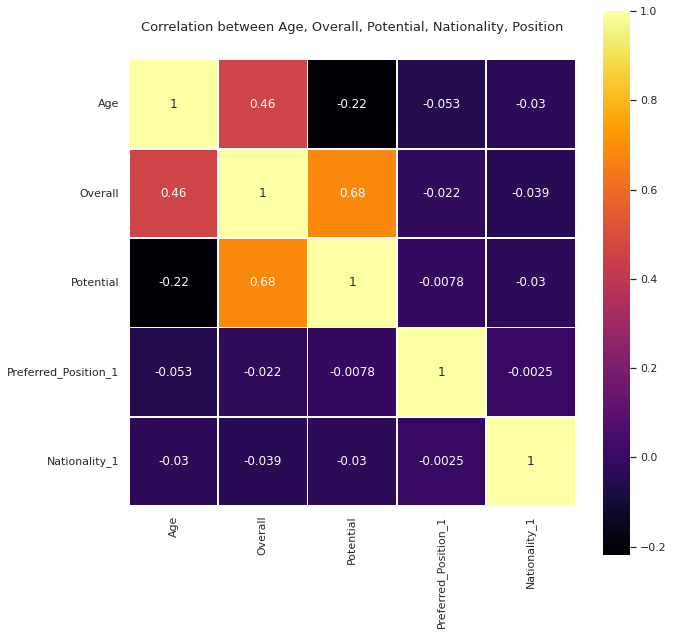

In [ ]:
colormap = plt.cm.inferno
plt.figure(figsize=(10,10))
plt.title('Correlation between Age, Overall, Potential, Nationality, Position', y=1.05,size=13)
sns.heatmap(Correlation_data.corr(),linewidths=0.5,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

In [ ]:
def in_preferred_position(list_pos, pos):
    if pos in list_pos:
        return True
    return False

In [ ]:
def get_best_squad(position):
    df_copy = data.copy()
    store = []
    for i in position:
        store.append([i,df_copy.loc[[df_copy[df_copy['Preferred Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), df_copy[df_copy['Preferred Position'] == i]['Overall'].max()])
        df_copy.drop(df_copy[df_copy['Preferred Position'] == i]["Overall"].idxmax(), inplace = True)
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)
squad_433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print (get_best_squad(squad_433))

Position            Player Overall
      GK          M. Neuer      92
      LB           Marcelo      87
      CB      Sergio Ramos      90
      CB      G. Chiellini      89
      RB          Carvajal      84
      LM        C. Eriksen      87
     CDM          T. Kroos      90
      RM      K. De Bruyne      89
      LW            Neymar      92
      ST Cristiano Ronaldo      94
      RW          L. Messi      93
